In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../GTZAN/Data/features_30_sec.csv')
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


In [3]:
x = df.drop(['filename','label'], axis = 1)
x.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,...,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035
1,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,...,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282
2,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,...,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025
3,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,...,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339
4,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,...,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160


In [4]:
y = df['label']
y

0      blues
1      blues
2      blues
3      blues
4      blues
       ...  
995     rock
996     rock
997     rock
998     rock
999     rock
Name: label, Length: 1000, dtype: object

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.11348684, 0.36227871, 0.69546819, ..., 0.10950252, 0.59918888,
        0.07825493],
       [0.11348684, 0.34362165, 0.79339231, ..., 0.09908114, 0.57963963,
        0.07594669],
       [0.11348684, 0.38983171, 0.6406919 , ..., 0.08731703, 0.50138091,
        0.04540464],
       ...,
       [0.11348684, 0.52914126, 0.48324551, ..., 0.07641964, 0.50491985,
        0.04398425],
       [0.11348684, 0.3874878 , 0.73872059, ..., 0.08886446, 0.46287061,
        0.06693823],
       [0.11348684, 0.37918422, 0.65027238, ..., 0.15461063, 0.59731769,
        0.08372859]])

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
label_encoder = LabelEncoder()
label_encoder.fit(y)
y_encoded = label_encoder.transform(y)
label_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
label_mapping

{0: 'blues',
 1: 'classical',
 2: 'country',
 3: 'disco',
 4: 'hiphop',
 5: 'jazz',
 6: 'metal',
 7: 'pop',
 8: 'reggae',
 9: 'rock'}

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size = 0.2, random_state = 42)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
KNN = KNeighborsClassifier(n_neighbors=6)

In [13]:
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [14]:
y_pred = KNN.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15  0  3  0  0  0  1  0  0  1]
 [ 0 12  0  0  0  1  0  0  0  0]
 [ 1  1 19  1  1  1  0  1  1  1]
 [ 2  0  1 16  1  0  1  0  0  0]
 [ 0  0  0  1 11  0  0  1  2  0]
 [ 0  2  2  1  0 16  0  1  0  0]
 [ 0  0  0  2  0  0 22  0  0  1]
 [ 0  0  1  1  0  0  0 10  1  0]
 [ 0  0  3  4  4  0  1  1  8  2]
 [ 2  1  4  2  1  0  0  1  1  9]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        20
           1       0.75      0.92      0.83        13
           2       0.58      0.70      0.63        27
           3       0.57      0.76      0.65        21
           4       0.61      0.73      0.67        15
           5       0.89      0.73      0.80        22
           6       0.88      0.88      0.88        25
           7       0.67      0.77      0.71        13
           8       0.62      0.35      0.44        23
           9       0.64      0.43      0.51        21

    accuracy                           0.69       200
   macro avg       

In [17]:
error_rate = []

for i in range(1,40):
  KNN = KNeighborsClassifier(n_neighbors = i)
  KNN.fit(x_train,y_train)
  pred_i = KNN.predict(x_test)

  error_rate.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error Rate')

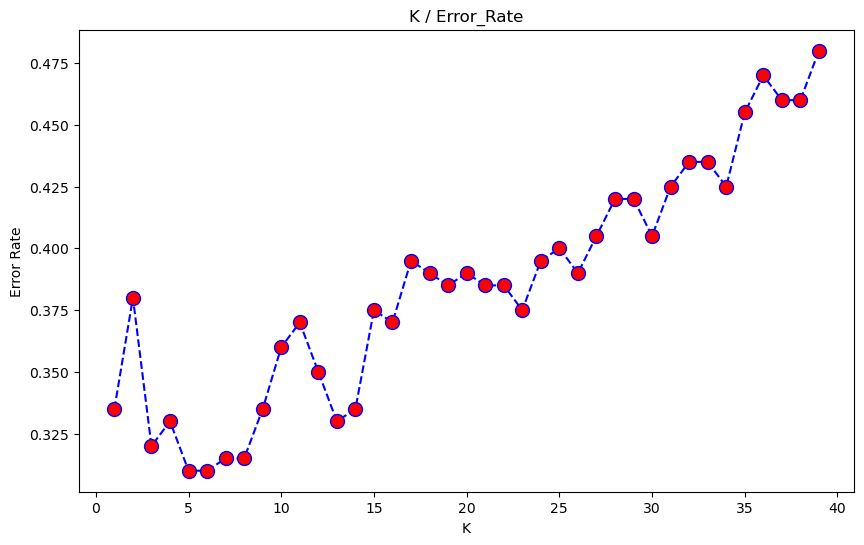

In [18]:
plt.figure(figsize = (10,6))

plt.plot(range(1,40), error_rate, color = 'blue', linestyle = '--', markersize = '10', markerfacecolor = 'red', marker = 'o')

plt.title('K / Error_Rate')
plt.xlabel('K')
plt.ylabel('Error Rate')

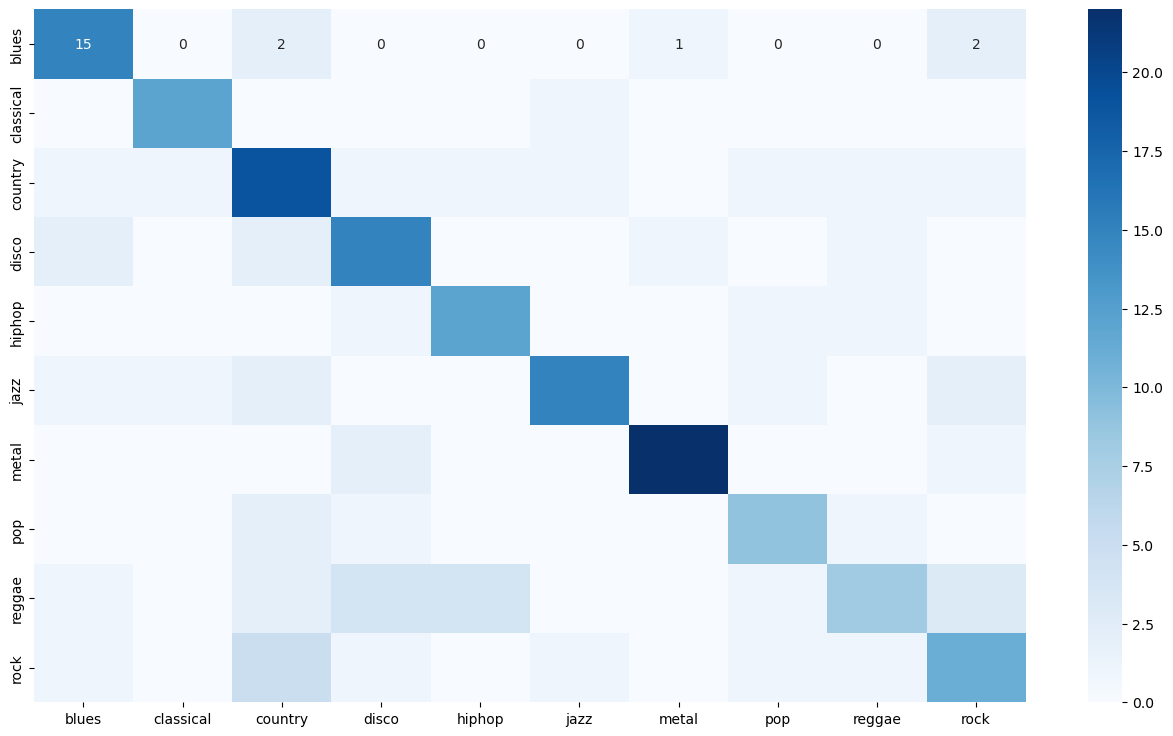

In [20]:
# Plot a confusion matrix to visualize how well the model is performing
import seaborn as sns
clf =   KNN = KNeighborsClassifier(n_neighbors = 5)
clf.fit(x_train, y_train)
preds = clf.predict(x_test)

# Confusion Matrix
confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        20
           1       0.75      0.92      0.83        13
           2       0.58      0.70      0.63        27
           3       0.57      0.76      0.65        21
           4       0.61      0.73      0.67        15
           5       0.89      0.73      0.80        22
           6       0.88      0.88      0.88        25
           7       0.67      0.77      0.71        13
           8       0.62      0.35      0.44        23
           9       0.64      0.43      0.51        21

    accuracy                           0.69       200
   macro avg       0.70      0.70      0.69       200
weighted avg       0.70      0.69      0.68       200

